## Simple Linear Regression

Yapilacaklar \
1- df.corr ile aralarindaki corelasyona bakilacak \
2-heatmap ile görsel hale getirilebilir \
3- R2 si corr**2 ile bulunacak \
4- np.polyfit(X,y, deg=1) ile katsayilar tahmin edilecek \
5- b1, b0 atamalari yapilip denklem yazilacak \
6 - Linear simple error (y-y_pred)**2  bulunacak


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#plt.rcParams["figure.figsize"] = (10, 6)   #görsellerin boyutlari icin
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Advertising.csv')
df

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
TV,200.0,147.0425,85.854236,0.7,74.375,149.75,218.825,296.4
radio,200.0,23.2640,14.846809,0.0,9.975,22.90,36.525,49.6
newspaper,200.0,30.5540,21.778621,0.3,12.750,25.75,45.100,114.0
sales,200.0,14.0225,5.217457,1.6,10.375,12.90,17.400,27.0


In [5]:
df.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


<AxesSubplot:>

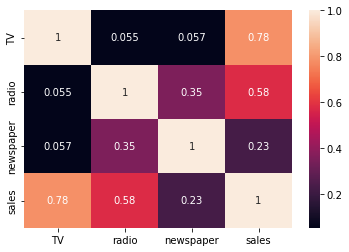

In [6]:
sns.heatmap(df.corr(),annot =True)

In [7]:
#Simple linear da bir bagimli bir bagimsiz 

### Create new independent variable 

In [8]:
df['total_spend'] = df.TV + df.radio + df.newspaper
df.head()

,TV,radio,newspaper,sales,total_spend
0,230.1,37.8,69.2,22.1,337.1
1,44.5,39.3,45.1,10.4,128.9
2,17.2,45.9,69.3,9.3,132.4
3,151.5,41.3,58.5,18.5,251.3
4,180.8,10.8,58.4,12.9,250.0


In [9]:
df = df.iloc[:, [0,1,2,4,3]]   #burda sütunlari siralamak icin
df.head() 

,TV,radio,newspaper,total_spend,sales
0,230.1,37.8,69.2,337.1,22.1
1,44.5,39.3,45.1,128.9,10.4
2,17.2,45.9,69.3,132.4,9.3
3,151.5,41.3,58.5,251.3,18.5
4,180.8,10.8,58.4,250.0,12.9


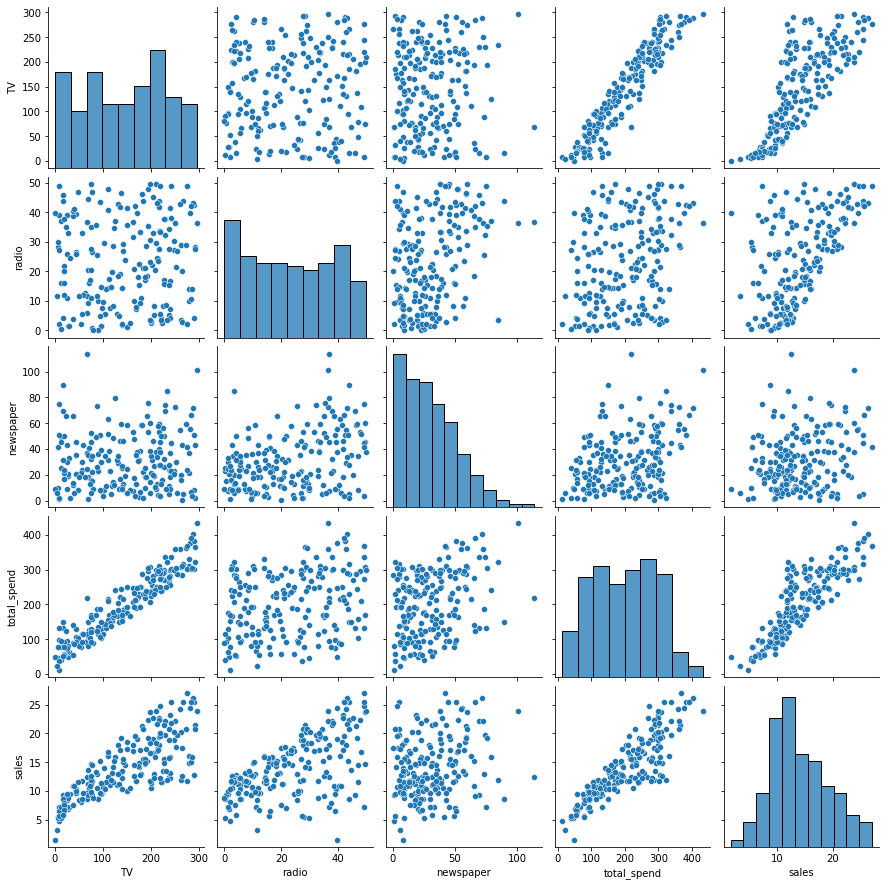

In [10]:
sns.pairplot(df);

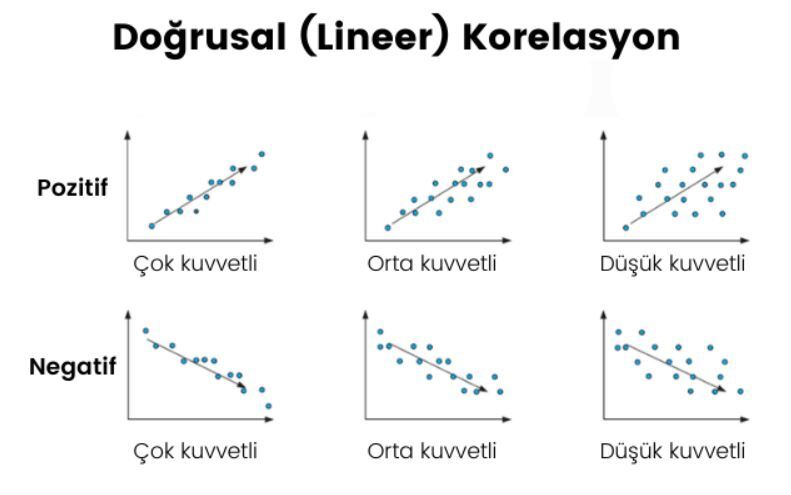

In [11]:
for i in df.drop(columns = "sales"):
    print(f"corr between sales and {i:<12}: {df.sales.corr(df[i])}")
    #i de columns lari yazdiriyor
    #i=12 esittirler altalta gelsin diye

corr between sales and TV          : 0.7822244248616064
corr between sales and radio       : 0.5762225745710553
corr between sales and newspaper   : 0.22829902637616528
corr between sales and total_spend : 0.8677123027017422


In [12]:
df = df[['total_spend','sales']]
df.head()

,total_spend,sales
0,337.1,22.1
1,128.9,10.4
2,132.4,9.3
3,251.3,18.5
4,250.0,12.9


<AxesSubplot:>

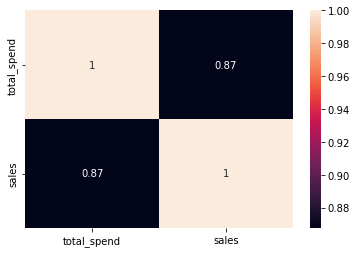

In [13]:
sns.heatmap(df.corr(), annot =True)

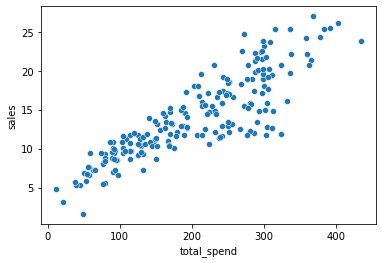

In [14]:
sns.scatterplot(x = 'total_spend', y = 'sales', data=df);

### Correlation between independent variable and dependent variable

In [15]:
corr = df.sales.corr(df.total_spend)
corr 

#yukarida bulmustuk zaten

0.8677123027017422

### Coefficent of determination (R2)

In [16]:
R2_score = corr**2    #bagimsiz degisken ,bagimli degiskenindeki degisiminin %75 i acikliyor
R2_score

0.7529246402599598

<AxesSubplot:xlabel='total_spend', ylabel='sales'>

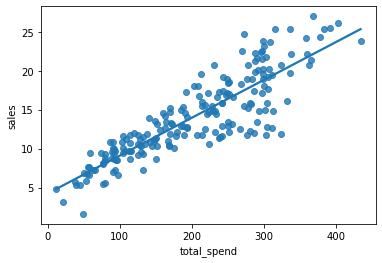

In [17]:
sns.regplot(x = 'total_spend', y= 'sales', data = df, ci =None)

# linear Regression

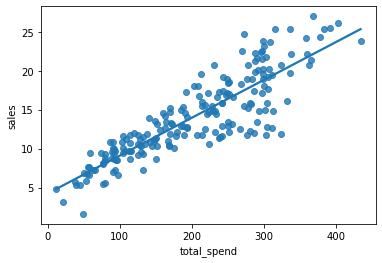

In [18]:
sns.regplot(x = "total_spend", y = "sales", data = df, ci = None);

# Spliting the dataset into X (independent variables) and y (dependent variables)

Independent variables = X \
Dependent variables   = y  \
y = b1 * X + b0     \
y = bağımlı değişken = target variable = dependent variable   \
b1 = katsayı/eğim, slope 0 < b1 < 1 and -1 < b1 < 0 b1=xin katsayisi   \
X = bağımsız değişken /feature, independent variable   \
b0 = otonom parametre / intercept /başlangıç parametresi -∞ < 0 < +∞

In [19]:
X = df["total_spend"]
y = df["sales"]


np.polyfit(X, y, deg =1)         #burda aslinda tahmin yapiyor,katsayilari buluyor,sayilara bakarak
#deg ,simple linearda 1 yaziliyor
#deg = 1, polinomun derecesini,yani ona birinci dereceden bir denkleme gäre hesapla diyoruz

#bagimli ve bagimsiz degiskenlerin katsayisini veriyor

#xin katsayisi  ve intercepti getiriyor

array([0.04868788, 4.24302822])

## Determination of coefficients (slopes, intercept)

In [20]:
slope, intercept = np.polyfit(X, y, deg =1)  #model olmadan ordaki dogrunun katsayilari icin
print("slope  b1   :", slope)
print("intercept b0 :", intercept)

#yukarida da aynisi varsns.regplot(x)

slope  b1   : 0.04868787931904818
intercept b0 : 4.243028216036325


In [21]:
b1, b0 = np.polyfit(X, y, deg=1)
y_pred = b1 * X + b0   # bu denkleme göre tahmin yapacak
values = {"actual": y, "predicted":y_pred, "resudial": y - y_pred, "LSE" : (y - y_pred)**2}
df_2 = pd.DataFrame(values)
df_2

,actual,predicted,resudial,LSE
0,22.1,20.655712,1.444288,2.085967
1,10.4,10.518896,-0.118896,0.014136
2,9.3,10.689303,-1.389303,1.930164
3,18.5,16.478292,2.021708,4.087302
4,12.9,16.414998,-3.514998,12.355211
...,...,...,...,...
195,7.6,6.954943,0.645057,0.416098
196,9.7,9.462369,0.237631,0.056469
197,12.8,13.625183,-0.825183,0.680926
198,25.5,23.318939,2.181061,4.757026


In [22]:
df_2.resudial.sum().round(3)

-0.0

In [23]:
df_2.LSE.sum()

1338.4439761715594

### Prediction with simple linear regression

In [24]:
potential_spend = np.linspace(0, 500, 100) # potansiyel harcama
potential_spend

array([  0.        ,   5.05050505,  10.1010101 ,  15.15151515,
        20.2020202 ,  25.25252525,  30.3030303 ,  35.35353535,
        40.4040404 ,  45.45454545,  50.50505051,  55.55555556,
        60.60606061,  65.65656566,  70.70707071,  75.75757576,
        80.80808081,  85.85858586,  90.90909091,  95.95959596,
       101.01010101, 106.06060606, 111.11111111, 116.16161616,
       121.21212121, 126.26262626, 131.31313131, 136.36363636,
       141.41414141, 146.46464646, 151.51515152, 156.56565657,
       161.61616162, 166.66666667, 171.71717172, 176.76767677,
       181.81818182, 186.86868687, 191.91919192, 196.96969697,
       202.02020202, 207.07070707, 212.12121212, 217.17171717,
       222.22222222, 227.27272727, 232.32323232, 237.37373737,
       242.42424242, 247.47474747, 252.52525253, 257.57575758,
       262.62626263, 267.67676768, 272.72727273, 277.77777778,
       282.82828283, 287.87878788, 292.92929293, 297.97979798,
       303.03030303, 308.08080808, 313.13131313, 318.18

In [25]:
predicted_sales_lin = b1 * potential_spend + b0
predicted_sales_lin

array([ 4.24302822,  4.4889266 ,  4.73482498,  4.98072336,  5.22662174,
        5.47252012,  5.7184185 ,  5.96431688,  6.21021526,  6.45611364,
        6.70201202,  6.9479104 ,  7.19380878,  7.43970716,  7.68560554,
        7.93150392,  8.1774023 ,  8.42330068,  8.66919906,  8.91509744,
        9.16099582,  9.4068942 ,  9.65279258,  9.89869097, 10.14458935,
       10.39048773, 10.63638611, 10.88228449, 11.12818287, 11.37408125,
       11.61997963, 11.86587801, 12.11177639, 12.35767477, 12.60357315,
       12.84947153, 13.09536991, 13.34126829, 13.58716667, 13.83306505,
       14.07896343, 14.32486181, 14.57076019, 14.81665857, 15.06255695,
       15.30845533, 15.55435371, 15.80025209, 16.04615048, 16.29204886,
       16.53794724, 16.78384562, 17.029744  , 17.27564238, 17.52154076,
       17.76743914, 18.01333752, 18.2592359 , 18.50513428, 18.75103266,
       18.99693104, 19.24282942, 19.4887278 , 19.73462618, 19.98052456,
       20.22642294, 20.47232132, 20.7182197 , 20.96411808, 21.21

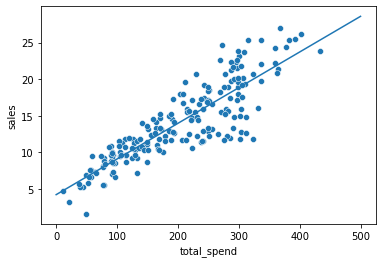

In [26]:
plt.plot(potential_spend, predicted_sales_lin);  #düz dogru icin
sns.scatterplot(x = "total_spend", y = "sales", data = df );

# Multilinear Regression 

Yapilacaklar \
1- df.corr a bakilacak \
2- heatmap ile bakilabilir  \
3- distplot ile dagilima bakilabilir  \
4- veri train ve test diye bölünecek  \
5- model kurulup, egitilecek  \
6- Tahmin yapilacak  \
7-.plot() ile veriye bir bakilabilir  \
8- R2, MAe, MSE, RMSE degerlerine bakilacak  \
9- Adjusted R" hesaplanacak  \
10- bir def fonlsiyou veri ölcümlerine bakilabilir

In [27]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as stats      #istatistikte yardimci olan
plt.rcParams["figure.figsize"] = (10, 6)

import warnings
warnings.filterwarnings("ignore")

In [28]:
#!pip install missingno
import missingno as msno

In [29]:
df = pd.read_csv('Advertising.csv')
df

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


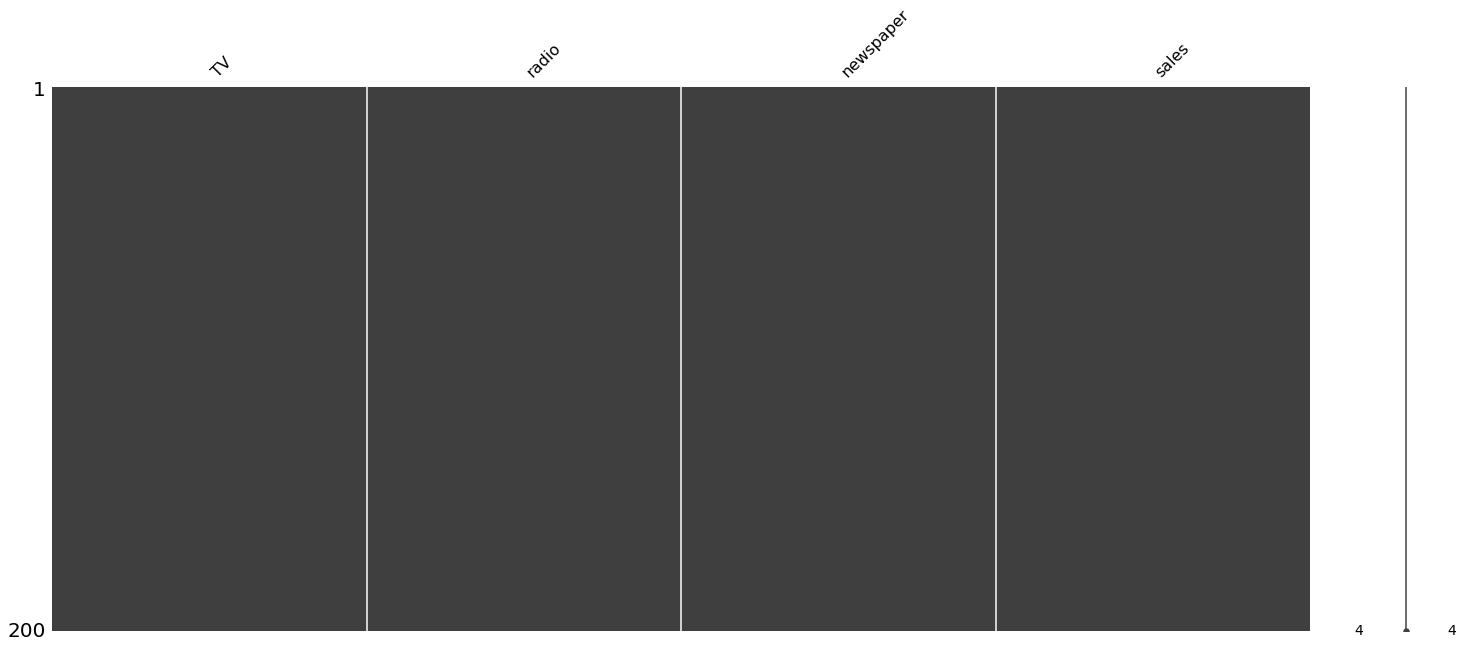

In [30]:
msno.matrix(df);

In [31]:
df.sort_values(by="sales", ascending = False)

,TV,radio,newspaper,sales
175,276.9,48.9,41.8,27.0
183,287.6,43.0,71.8,26.2
198,283.6,42.0,66.2,25.5
98,289.7,42.3,51.2,25.4
147,243.2,49.0,44.3,25.4
...,...,...,...,...
108,13.1,0.4,25.6,5.3
78,5.4,29.9,9.4,5.3
8,8.6,2.1,1.0,4.8
155,4.1,11.6,5.7,3.2


In [32]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
TV,200.0,147.0425,85.854236,0.7,74.375,149.75,218.825,296.4
radio,200.0,23.2640,14.846809,0.0,9.975,22.90,36.525,49.6
newspaper,200.0,30.5540,21.778621,0.3,12.750,25.75,45.100,114.0
sales,200.0,14.0225,5.217457,1.6,10.375,12.90,17.400,27.0


In [33]:
print(np.mean([100, 110, 120, 115]))
print(np.std([100, 110, 120, 115])) #bu standart sapmaya bir örnek olsun diye

111.25
7.39509972887452


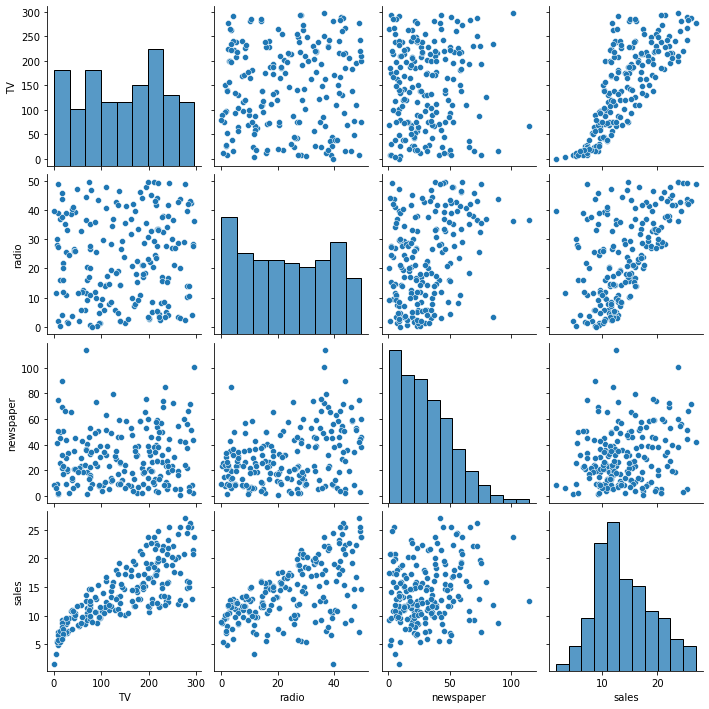

In [34]:
sns.pairplot(df)

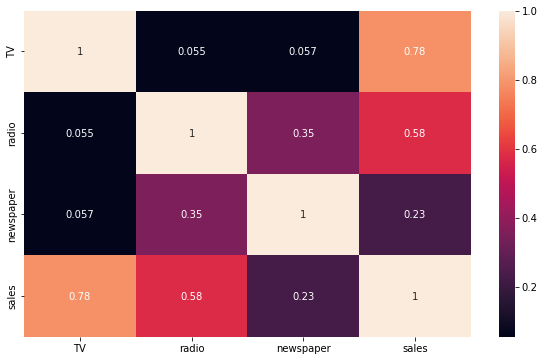

In [35]:
sns.heatmap(df.corr(), annot=True);

In [36]:
from scipy.stats import skew    #skewness 

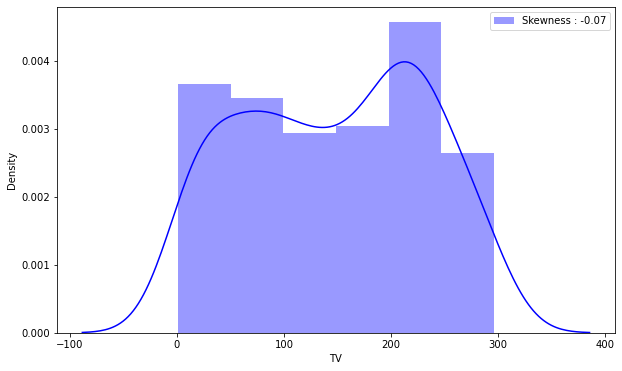

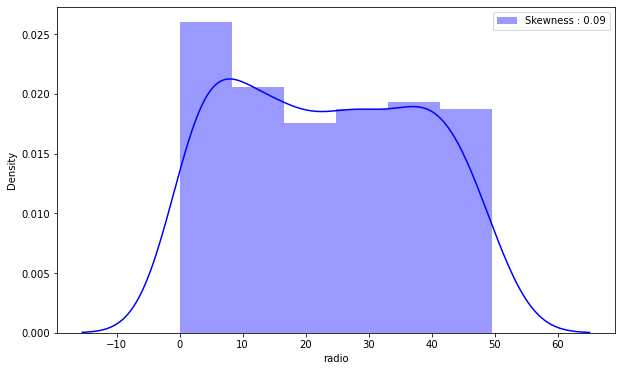

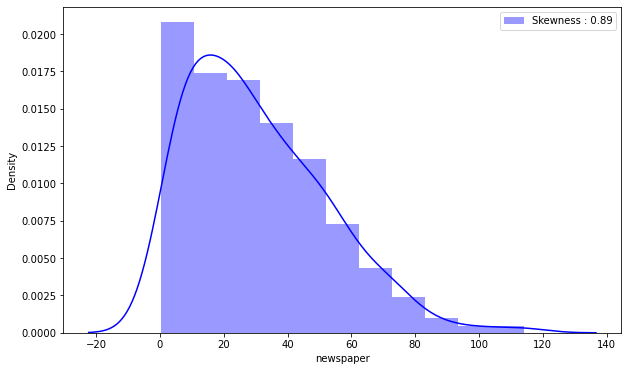

In [37]:
for j in df.drop(columns = "sales").columns:
    g = sns.distplot(df[j], color= "b", label= "Skewness : %.2f"%(df[j].skew()))
    g = g.legend(loc= "best")
    plt.show()
    
    
    #skewwness 0 a yakin olmasi iyi
    
    #right skew +1e doğru left skew -1 e doğru

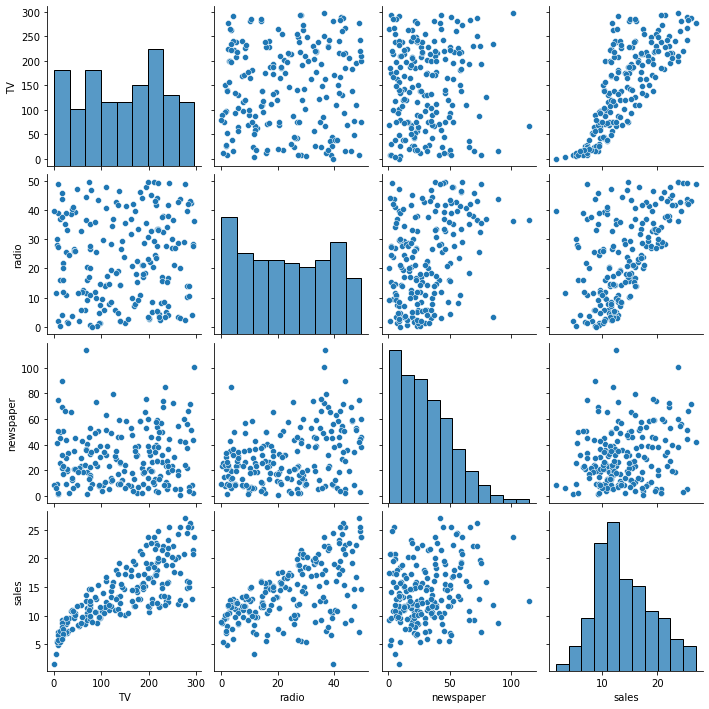

In [38]:
sns.pairplot(df);
#newspaperinki de saga carpik

In [39]:
df.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


1000 e kadar % 20/30 test % 80/70 train  \
1000 ile 100000 satır arasında %10/20 test %90/80 train  \
100000 ile 100000000 satır arasında %5 test %95 train   \
100000000 üzeri satırlık datada %1 test % 99 train   \

In [40]:
#!pip install sklearn

In [41]:
X = df.drop(columns = "sales")
y = df["sales"]

In [42]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state= 42)

In [43]:
print("X Train features shape: {}\ny Train features shape: {}\nX Test features shape : {}\nY Test features shape : {}".format
      (X_train.shape, y_train.shape, X_test.shape, y_test.shape))

X Train features shape: (140, 3)
y Train features shape: (140,)
X Test features shape : (60, 3)
Y Test features shape : (60,)


## Model Fitting and Compare Actual and Predicted Labels

In [44]:
from sklearn.linear_model import LinearRegression

In [45]:
model = LinearRegression()

In [46]:
model.fit(X_train,y_train)

LinearRegression()

In [47]:
y_pred = model.predict(X_test)
y_pred

array([16.5653963 , 21.18822792, 21.55107058, 10.88923816, 22.20231988,
       13.35556872, 21.19692502,  7.35028523, 13.27547079, 15.12449511,
        9.01443026,  6.52542825, 14.30205991,  8.97026042,  9.45679576,
       12.00454351,  8.91549403, 16.15619251, 10.29582883, 18.72473553,
       19.76821818, 13.77469028, 12.49638908, 21.53501762,  7.60860741,
        5.6119801 , 20.91759483, 11.80627665,  9.08076637,  8.51412012,
       12.17604891,  9.9691939 , 21.73008956, 12.77770578, 18.1011362 ,
       20.07590796, 14.26202556, 20.93826535, 10.83938827,  4.38190607,
        9.51332406, 12.40486324, 10.17045434,  8.09081363, 13.16388427,
        5.2243552 ,  9.28893833, 14.09330719,  8.69024497, 11.66119763,
       15.71848432, 11.63156862, 13.35360735, 11.1531472 ,  6.33636845,
        9.76157954,  9.4195714 , 24.25516546,  7.69519137, 12.15317572])

In [48]:
model.coef_

#ilki tv katsayisi, ikinci radio,ücüncü newspaper

array([0.04405928, 0.1992875 , 0.00688245])

In [49]:
model.intercept_

2.7089490925159065

### y_pred = b1 * TV + b2 * radio + b3 * newspaper + b0 matematiksel formül

In [50]:
sum(X_test.loc[95] * model.coef_) + model.intercept_    #ilk degerle ayni

16.565396297434837

In [51]:
y_pred[0]

16.565396297434837

In [52]:
y_test[0:1]

95    16.9
Name: sales, dtype: float64

In [53]:
my_dict = {"Actual": y_test, "pred": y_pred, "residual": y_test-y_pred}
comparing = pd.DataFrame(my_dict)
comparing.head()

,Actual,pred,residual
95,16.9,16.565396,0.334604
15,22.4,21.188228,1.211772
30,21.4,21.551071,-0.151071
158,7.3,10.889238,-3.589238
128,24.7,22.202320,2.497680


In [54]:
result_sample = comparing.head(25)
comparing.head()

,Actual,pred,residual
95,16.9,16.565396,0.334604
15,22.4,21.188228,1.211772
30,21.4,21.551071,-0.151071
158,7.3,10.889238,-3.589238
128,24.7,22.202320,2.497680


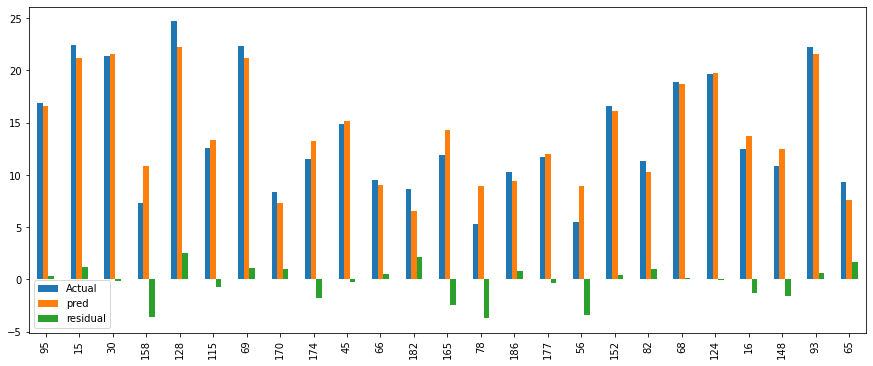

In [55]:
result_sample.plot(kind = "bar", figsize=(15,6));

## Error Metrics

In [133]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [57]:
R2_score = r2_score(y_test, y_pred)
R2_score

# elimdeki datayla sales'teki degisimin %86 sini acikliyabiliyorum,
#geri kalani benim bilgim olmayan nedenlerden dolayi olmus

#%14 ü neden tahmin edememis,outlier olabilir,
#bir evde beklenmeyen featuresle fazla olabilir,modelin bundan haberi olmayabilir
#model elindekilerle bukadar acikliyor,
#modelin basarisi sadece Rkare ile ölcülemez


# R2’=0.85 ise, y değişkenindeki toplam varsyasyonun %85’i açıklanabilirken, %15’i açıklanamaz.

# kafanıza göre veri ekleseniz de r^2 artar
#ama bu yanıltır sadece bi göstergedir r^2 buraya bağlanıp kalmamak lazım

0.8609466508230368

In [58]:
mae = mean_absolute_error(y_test, y_pred)
mae

1.5116692224549089

In [59]:
mse = mean_squared_error(y_test, y_pred)
mse

3.796797236715219

In [60]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
rmse

1.9485372043446385

In [61]:
# biz hem mae rmse yi yapiyoruz, eger aralarinda cok fark varsa,bir terslik var demektir
# 

In [62]:
sales_mean = df["sales"].mean()
sales_mean

14.022500000000003

In [63]:
mae/sales_mean  #%11 kayip

0.10780311802138767

In [64]:
rmse /sales_mean   # %18 

0.13895790367941793

## Adjusted R2 Score (düzenlenmiş R2 skor)

In [65]:
def adj_r2(y_test, y_pred, df):
    r2 = r2_score(y_test, y_pred)
    n = df.shape[0]   # number of observations gözlem
    p = df.shape[1]-1 # number of independent variables feature
    adj_r2 = 1 - (1-r2)*(n-1)/(n-p-1)
    return adj_r2

In [66]:
adj_r2(y_test, y_pred, df)

0.8588182832335934

In [67]:
def adj_r2(y_test, y_pred, df):
    r2 = r2_score(y_test, y_pred)
    n = df.shape[0]   # number of observations
    p = 100 # number of independent variables
    adj_r2 = 1 - (1-r2)*(n-1)/(n-p-1)
    return adj_r2

adj_r2(y_test, y_pred, df)

#features eklerken, her features icin 15-20 row da eklememiz gerekir

0.7204887223614578

## What is the concept of punisment for RMSE error metric?

In [138]:
variables = {"Actual": [1000, 2000, 3000, 4000, 5000], "pred": [1100, 2200, 3200, 4200, 5300]}
variables2 = {"Actual": [1000, 2000, 3000, 4000, 5000], "pred": [1100, 2200, 3200, 4200, 5800]} 

In [139]:
df_2 = pd.DataFrame(variables)
df_2

,Actual,pred
0,1000,1100
1,2000,2200
2,3000,3200
3,4000,4200
4,5000,5300


In [140]:
df_3 = pd.DataFrame(variables2)
df_3

,Actual,pred
0,1000,1100
1,2000,2200
2,3000,3200
3,4000,4200
4,5000,5800


In [141]:
df_2["residual"] = abs(df_2.Actual - df_2.pred)
df_2

,Actual,pred,residual
0,1000,1100,100
1,2000,2200,200
2,3000,3200,200
3,4000,4200,200
4,5000,5300,300


In [142]:
df_3["residual"] = abs(df_3.Actual - df_3.pred)
df_3

,Actual,pred,residual
0,1000,1100,100
1,2000,2200,200
2,3000,3200,200
3,4000,4200,200
4,5000,5800,800


In [143]:
df_2.residual.sum()/5    #mean Absolut error

200.0

In [145]:
(((df_2.residual**2).sum())/5)**0.5   #root mean absolut error

209.76176963403032

In [146]:
df_3.residual.sum()/5   #mean Absolut error

300.0

In [76]:
(((df_3.residual**2).sum())/5)**0.5   #Rmse

# burda df3 te mas ve rmse arasndaki farkin fazla cikmasinn sebebi,outlier gibi seylerdne dolayi
#gercek ve tahmin arasindaki farkin karesini aldigimiz icin,o kare alma büyütüyor

392.42833740697165

In [77]:
def eval_metric(actual, pred):
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    rmse = np.sqrt(mean_squared_error(actual, pred))
    R2_score = r2_score(actual, pred)
    print("Model testing performance: ")
    print("---------------------------")
    print(f"R2_score \t: {R2_score}")
    print(f"MAE \t\t: {mae}")
    print(f"MSE \t\t: {mse}")
    print(f"RMSE \t\t: {rmse}")
    
eval_metric(y_test, y_pred)    

Model testing performance: 
---------------------------
R2_score 	: 0.8609466508230368
MAE 		: 1.5116692224549089
MSE 		: 3.796797236715219
RMSE 		: 1.9485372043446385


In [78]:
y_train_pred = model.predict(X_train)

eval_metric(y_train, y_train_pred)

#egittigimiz veriler üzerinden tahmin ettigimiz icin hata orani biraz daha düsük cikti
#egitim setinden gelen Rkare daha büyük cikti

#bu iki sonuclar arasinda cok büyük fark varsa, overfiting var demektir
#rmse deki az fark olmasi ezber yapmadigini gösterir.



Model testing performance: 
---------------------------
R2_score 	: 0.9055159502227753
MAE 		: 1.1581502948072533
MSE 		: 2.4793551789057866
RMSE 		: 1.574596830590544


### Is data suitable for linear Regression?

In [79]:
# hatalarin normal dagilima uyup olmadigina bakarak belirliyoruz

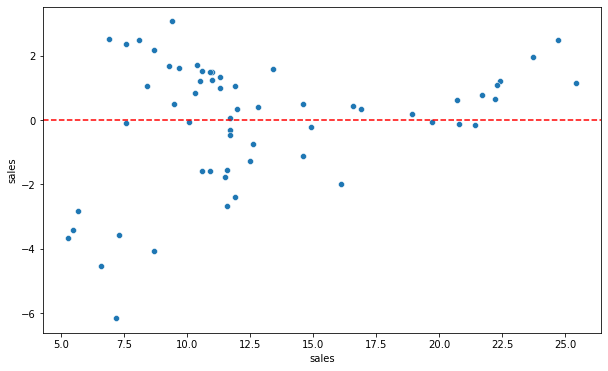

In [80]:
residuals = y_test - y_pred  
plt.figure(figsize= (10,6))
sns.scatterplot(x = y_test, y = residuals) # residuals
plt.axhline(y= 0, color = "r", linestyle = "--") #horizantal line
plt.show()

In [149]:
comparing.head(10)  #yukarida buldugumuz residuals'lar

,Actual,pred,residual
95,16.9,16.565396,0.334604
15,22.4,21.188228,1.211772
30,21.4,21.551071,-0.151071
158,7.3,10.889238,-3.589238
128,24.7,22.202320,2.497680
115,12.6,13.355569,-0.755569
69,22.3,21.196925,1.103075
170,8.4,7.350285,1.049715
174,11.5,13.275471,-1.775471
45,14.9,15.124495,-0.224495


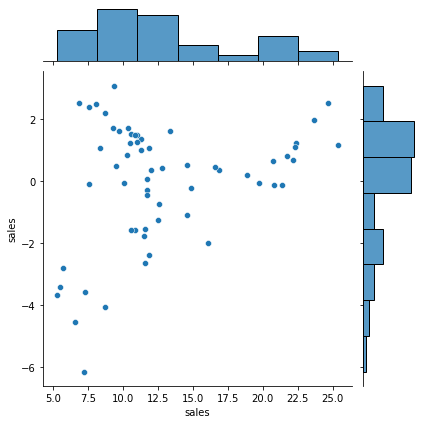

In [81]:
sns.jointplot(x=y_test, y= y_test - y_pred , data=df);

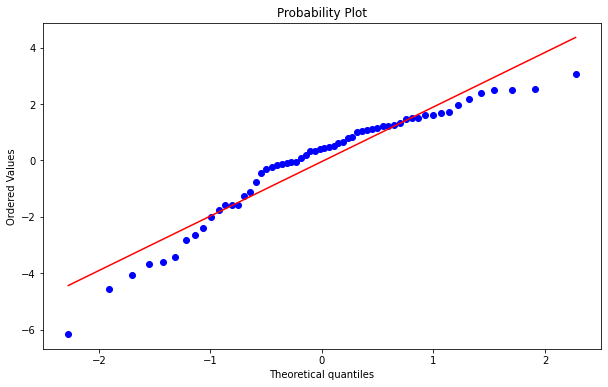

In [82]:
stats.probplot(residuals, dist = "norm", plot=plt);

In [83]:
skew(residuals)

-0.9865673346742723

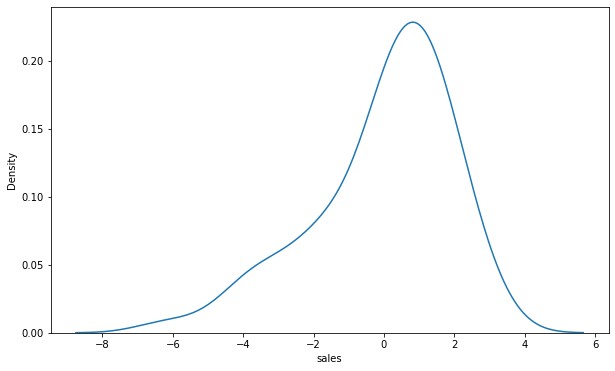

In [84]:
sns.kdeplot(residuals);   #residuls'larin dagilimi

In [85]:
#y_test - y_pred #arasındaki nokta 0 ise tam ideal değerler oradadır yani mükemmel tahmin yapmış diyebiliriz. 
#0 nokasına ne kadar uzakta kalıyorsa o kadar sapma var yani düzgün tahmin olmamış

#skewness olursa normal dağılım olarak kabul edilmez. diğer görüşte saga 
#yada sola skewness te tüm fetaure lar için aynı durum varsa buda başarılı der

In [86]:
#!pip install yellowbrick

In [87]:
from yellowbrick.regressor import ResidualsPlot

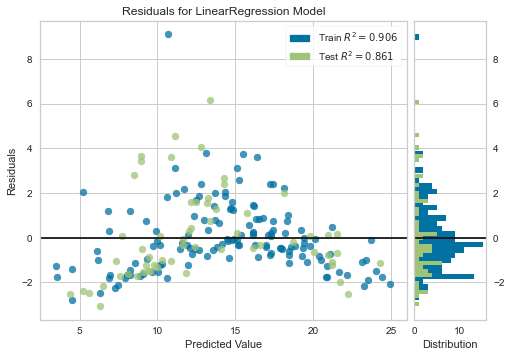

In [88]:
# Instantiate the linear model and visualizer
model = LinearRegression()
visualizer = ResidualsPlot(model)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show();                 # Finalize and render the figure

In [89]:
from yellowbrick.regressor import PredictionError

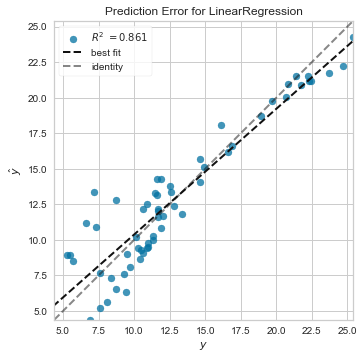

In [90]:
model = LinearRegression()
visualizer = PredictionError(model)

visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show();

#üstüste gelmesi,veya birbirine ne kadar yakinsa,bu istenilen durumdur,
#siyah koyu best fit line,

## Retraining Model on Full Data

In [91]:
#herseyi yaptiktan sonra tüm modelimizi atip sonucuna bakiyorum
#bu aslinda cok saglikli degil,veriyi bölmeden attik,sadece manuelverilen bir degerin tahminine bakacagiz

In [92]:
final_model = LinearRegression()
final_model.fit(X, y)

LinearRegression()

In [93]:
final_model.coef_

#katsayilar, TV deki bir birimlik artis, saleste %5 civarinda bir artisa sebep oluyor
#radioda ise %18 etki ediyor, gazete ise zarar

#bu katsayilarla iselm bitmis degil,daha scaling yapacagiz,orda sartlar esit olmali


array([ 0.04576465,  0.18853002, -0.00103749])

In [94]:
final_model.intercept_

2.9388893694594085

In [95]:
coeff_df = pd.DataFrame(final_model.coef_, index = X.columns, columns = ["Coefficient"] )
coeff_df

#bu sayilar anlamli degil, ölceklendirdikten sonra belli olur
#burda DAtaFRame cevirdik bir üüstte yazani

,Coefficient
TV,0.045765
radio,0.188530
newspaper,-0.001037


In [150]:
df.head(2)

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4


## Prediction on new data

In [96]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [97]:
adv = [[150, 20, 15]]   #burda yeni vermis gibi oluyoruz
adv

[[150, 20, 15]]

In [98]:
final_model.predict(adv)

array([13.55862413])

In [99]:
final_model.coef_

array([ 0.04576465,  0.18853002, -0.00103749])

In [100]:
final_model.intercept_

2.9388893694594085

In [101]:
sum(final_model.coef_ * [150, 20, 15]) + final_model.intercept_  
# yeni datanın değerini manuel olarak saglamasını yaptık.
#bu bizim ilk tahminimiz

13.558624130495994

In [102]:
adv_2 = [[150, 20, 15], [160, 20, 15]] 
# iki data verdik fakat ikinci data da 150 yerine 160

In [103]:
final_model.predict(adv_2)

array([13.55862413, 14.01627059])

# ML_3_Poly Regression-Overfitting-Underfitting

## Poly Regression (coklu regression)

Polinom Regresyon ,
bağımsız değişkenler ile bağımlı değişkenler arasındaki \
ilişkinin n'inci derece polinomda modellendiği bir regresyon analizi şeklidir. \
Types of polinomials  \
1st degree ---> linear    b1x + b0  \
2nd degree ---> Quadratic b2x**2 + b1x + b0 2.derece   \
3rd degree ---> Cubic     b3x**3 + b2x**2 + b1x + b0 3.derece  \

In [104]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = (10,6)

In [105]:
## polinomal Features 

In [106]:
from sklearn.preprocessing import PolynomialFeatures

In [107]:
data = np.array([[2 ,3, 4]])
print(data)

[[2 3 4]]


In [108]:
trans = PolynomialFeatures(degree= 2, include_bias =False) 
# data yı 2 dereceden Polynomial Features üreteceğim

In [109]:
trans.fit(data)

PolynomialFeatures(include_bias=False)

In [110]:
trans.transform(data)
#önce arrayleri 1 ile carpti,sonra 2yi sirayla herbiriyle carpti,
#sonra karelerini aldi
# calisma formülü yukarida markdowndaki formüle göre calisiyor

array([[ 2.,  3.,  4.,  4.,  6.,  8.,  9., 12., 16.]])

In [111]:
trans.fit_transform(data)

# degree 3 yapınca hem feature sayısı artıyor hemde işlemin yorumlanması zorlaşıyor işler karmaşıklaşıyor
# 2, 3, 4, 2x3, 2x4, 3x4, 2**2, 3**2, 4**2, 2x3x4, 3x2**2, 4x2**2, 2x3**2, 4x3**2, 2x4**2, 3x4**2, 2**3, 3**3, 4**3

array([[ 2.,  3.,  4.,  4.,  6.,  8.,  9., 12., 16.]])

## Read DataSet

In [159]:
df = pd.read_csv("Advertising.csv")
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [160]:
X = df.drop("sales", axis =1)
y = df.sales

In [161]:
poly_conv = PolynomialFeatures(degree= 2 , include_bias = False)  #polinom ile features olusturduk

In [163]:
poly_conv.fit(X)

PolynomialFeatures(include_bias=False)

In [167]:
X.head(2)

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1


In [116]:
poly_features =poly_conv.transform(X) #Polynomial feaure çevirdik

In [168]:
poly_features

array([[ 230.1 ,   37.8 ,   69.2 , ..., 1428.84, 2615.76, 4788.64],
       [  44.5 ,   39.3 ,   45.1 , ..., 1544.49, 1772.43, 2034.01],
       [  17.2 ,   45.9 ,   69.3 , ..., 2106.81, 3180.87, 4802.49],
       ...,
       [ 177.  ,    9.3 ,    6.4 , ...,   86.49,   59.52,   40.96],
       [ 283.6 ,   42.  ,   66.2 , ..., 1764.  , 2780.4 , 4382.44],
       [ 232.1 ,    8.6 ,    8.7 , ...,   73.96,   74.82,   75.69]])

In [117]:
poly_features.shape

# 3 column vardı karesi kadar oldu

(200, 9)

In [172]:
cm = pd.DataFrame(poly_features)   #hoca sonradan columns isimleri eklemis,
cm.head(4)                         #isimleri neye göre ekledigi yukaridaki islemde var, önce herbiriyle falan

# cm yi ben kendim,poly_features'in ne olduguna bakma icin yazdim

,0,1,2,3,4,5,6,7,8
0,230.1,37.8,69.2,52946.01,8697.78,15922.92,1428.84,2615.76,4788.64
1,44.5,39.3,45.1,1980.25,1748.85,2006.95,1544.49,1772.43,2034.01
2,17.2,45.9,69.3,295.84,789.48,1191.96,2106.81,3180.87,4802.49
3,151.5,41.3,58.5,22952.25,6256.95,8862.75,1705.69,2416.05,3422.25


In [118]:
pd.DataFrame(poly_features, columns =["TV", "radio", "newspaper", "TV^2", "TV&Radio", \
                                   "TV&Newspaper", "Radio^2", "Radio&newspaper", "Newspaper^2"]).head()
# yeni feature leri df ile yeni isin verdik df olarak return ettik

,TV,radio,newspaper,TV^2,TV&Radio,TV&Newspaper,Radio^2,Radio&newspaper,Newspaper^2
0,230.1,37.8,69.2,52946.01,8697.78,15922.92,1428.84,2615.76,4788.64
1,44.5,39.3,45.1,1980.25,1748.85,2006.95,1544.49,1772.43,2034.01
2,17.2,45.9,69.3,295.84,789.48,1191.96,2106.81,3180.87,4802.49
3,151.5,41.3,58.5,22952.25,6256.95,8862.75,1705.69,2416.05,3422.25
4,180.8,10.8,58.4,32688.64,1952.64,10558.72,116.64,630.72,3410.56


In [119]:
#bu konu underfittin ve overfitting ile mücadelede yüksek tahminler yapmasi icin hazirliyoruz

#PolynominalFeatures , elimizdeki featureları birbiriyle işlemlere sokarak yeni yeni başka 
#featurelar elde etmemizi sağlıyor. Bu sayede feature daha fazla olunca model daha iyi öğreniyor 
#aslında ama overfittinge gitme ihtimali çok çok yüksek

In [120]:
#amacimiz önce overfittinge götürmek icin bunu yapiyoruz
# bir nevi ispat yapacagiz, yoksa digerlrinde kullanmayacagiz

## Train | Test Split

In [121]:
from sklearn.model_selection import train_test_split

In [122]:
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size= 0.3, random_state= 101)
# X olarak yeni oluşturduğum poly_features datasını veriyoruz.

In [123]:
from sklearn.linear_model import LinearRegression

In [124]:
model_poly = LinearRegression()
model_poly.fit(X_train, y_train)

LinearRegression()

In [125]:
y_pred = model_poly.predict(X_test)

In [126]:
my_dict = {"Actual": y_test, "pred": y_pred, "residual": y_test-y_pred}
compare = pd.DataFrame(my_dict)
compare.head(20)

#derecesi arttikca regression dogrusu giderek datanin icine kivriliyor
#zaten hata paylari baya az cikti residual

,Actual,pred,residual
37,14.7,13.948562,0.751438
109,19.8,19.334803,0.465197
31,11.9,12.319282,-0.419282
89,16.7,16.762863,-0.062863
66,9.5,7.902109,1.597891
119,6.6,6.941438,-0.341438
54,20.2,20.133727,0.066273
74,17.0,17.500927,-0.500927
145,10.3,10.568890,-0.268890
142,20.1,20.125518,-0.025518


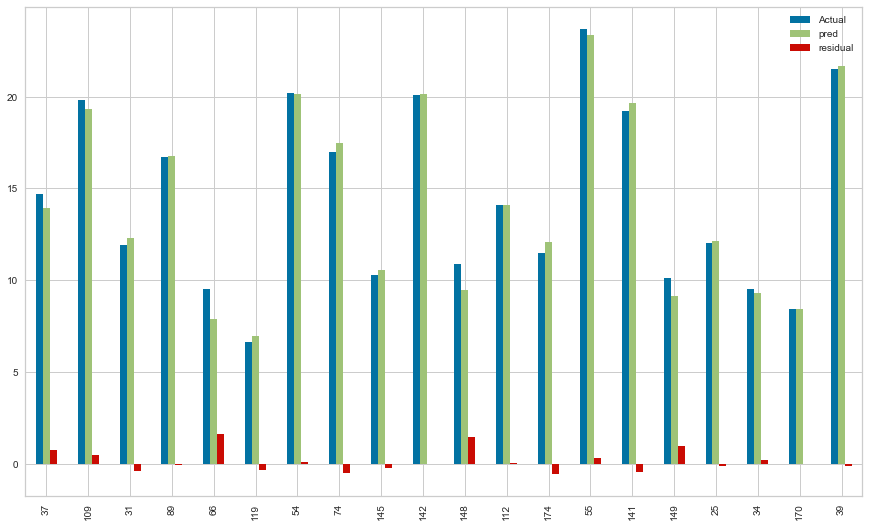

In [127]:
compare.head(20).plot(kind="bar", figsize=(15,9))
plt.show();

In [128]:
model_poly.coef_

#bunlar bizim sonradan olusturdugumuz featureslerin katsayilari sirayla

array([ 5.17095811e-02,  1.30848864e-02,  1.20000085e-02, -1.10892474e-04,
        1.14212673e-03, -5.24100082e-05,  3.34919737e-05,  1.46380310e-04,
       -3.04715806e-05])

In [129]:
df_coef = pd.DataFrame(model_poly.coef_, index = ["TV", "radio", "newspaper", "TV^2", "TV&Radio", \
                                   "TV&Newspaper", "Radio^2", "Radio&newspaper", "Newspaper^2"], columns = ["coef"])

In [130]:
df_coef

#katsayilar bunlar 

,coef
TV,0.051710
radio,0.013085
newspaper,0.012000
TV^2,-0.000111
TV&Radio,0.001142
TV&Newspaper,-0.000052
Radio^2,0.000033
Radio&newspaper,0.000146
Newspaper^2,-0.000030


In [131]:
#yukarida TVnin karesi yüksekti, simdi en kücük cikti

In [132]:
model_poly.predict([[2.301000e+02, 3.780000e+01, 6.920000e+01, 5.294601e+04,
       8.697780e+03, 1.592292e+04, 1.428840e+03, 2.615760e+03,
       4.788640e+03]])

#bu degerlerini verince bir tahmin yapti,kendi katsayilarina göre

array([21.86190699])

## Evaluation on the dataset